In [1]:
import pandas as pd
import seaborn as sn
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
df = pd.read_csv('bhp.csv')
df.shape

(13200, 7)

In [3]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [5]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

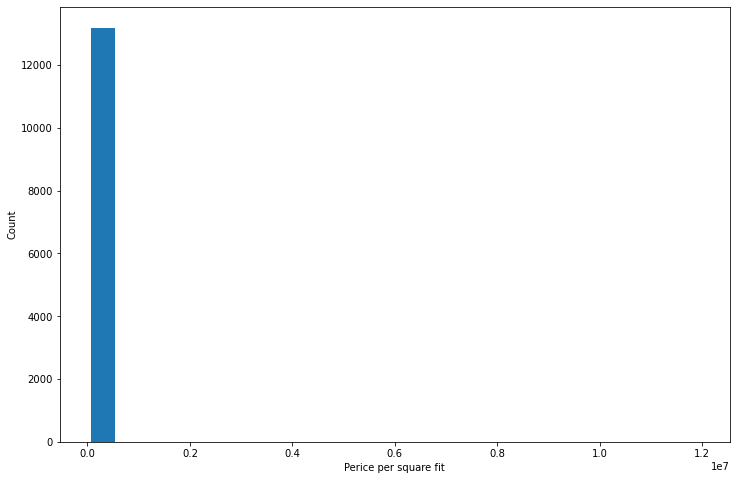

In [6]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Perice per square fit')
plt.ylabel('Count')
plt.show()

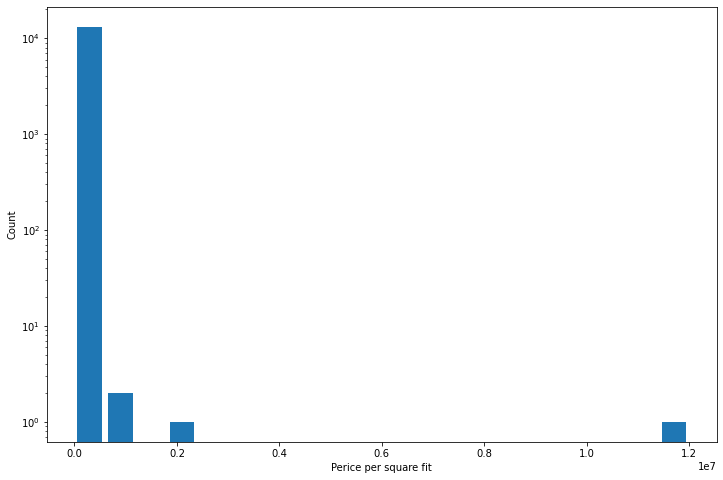

In [7]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Perice per square fit')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

In [8]:
# Treat outlier using percentile first
lower_limit, upper_limit = df.price_per_sqft.quantile([0.001, 0.999])
lower_limit, upper_limit

(1366.184, 50959.36200000099)

In [9]:
outliers =  df[(df.price_per_sqft>upper_limit) | (df.price_per_sqft<lower_limit)]
outliers.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
6356,Bommenahalli,4 Bedroom,2940.0,3.0,2250.0,4,76530
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
5417,Ulsoor,4 BHK,36000.0,4.0,450.0,4,1250
7799,other,4 BHK,2000.0,3.0,1063.0,4,53150
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333
7166,Yelahanka,1 Bedroom,26136.0,1.0,150.0,1,573
9436,Indira Nagar,4 Bedroom,2400.0,5.0,1250.0,4,52083
8300,Kengeri,1 BHK,1200.0,1.0,14.0,1,1166


In [10]:
df2 =  df[(df.price_per_sqft<upper_limit) & (df.price_per_sqft>lower_limit)]
df2.shape

(13172, 7)

In [11]:
df.shape

(13200, 7)

In [12]:
df.shape[0] - df2.shape[0]

28

In [13]:
# we remove total 28 outlier

In [15]:
# Now remove outlier using 4 standart deviation
max_limit = df2.price_per_sqft.mean() + 4*df2.price_per_sqft.std()
min_limit = df2.price_per_sqft.mean() - 4*df2.price_per_sqft.std()
max_limit, min_limit

(23227.73653589429, -9900.429065502549)

In [17]:
df2 [(df2.price_per_sqft>max_limit)|(df2.price_per_sqft<min_limit)].sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9853,Indira Nagar,5 Bedroom,2400.0,5.0,700.0,5,29166
3340,other,19 BHK,2000.0,16.0,490.0,19,24500
9229,1st Phase JP Nagar,4 Bedroom,1200.0,4.0,300.0,4,25000
1705,other,4 Bedroom,1700.0,2.0,550.0,4,32352
6709,Malleshwaram,4 Bedroom,4000.0,4.0,1100.0,4,27500
12900,HAL 2nd Stage,5 Bedroom,2040.0,4.0,500.0,5,24509
8157,other,4 BHK,2230.0,4.0,792.0,4,35515
3488,Banashankari Stage III,8 Bedroom,1200.0,7.0,350.0,8,29166
7262,other,4 Bedroom,1200.0,5.0,325.0,4,27083
9711,Rajaji Nagar,2 Bedroom,1056.0,1.0,250.0,2,23674


In [18]:
df2.shape

(13172, 7)

In [19]:
df3 = df2[(df2.price_per_sqft>min_limit) & (df2.price_per_sqft<max_limit)]
df3.shape

(13047, 7)

In [20]:
df2.shape[0]-df3.shape[0]

125

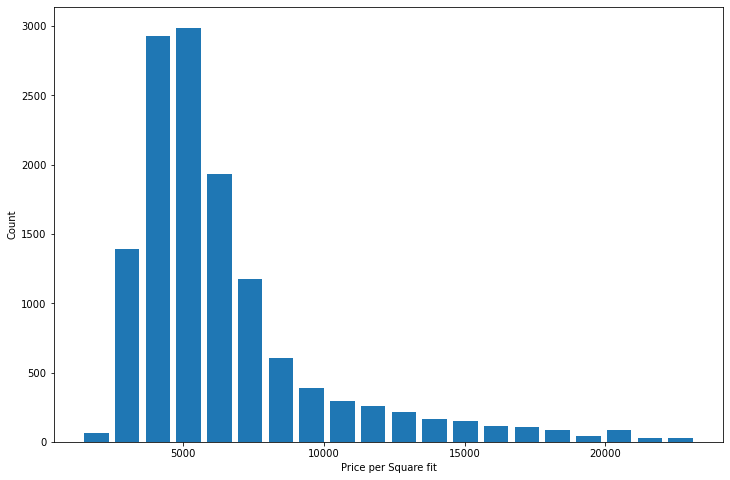

In [21]:
plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per Square fit')
plt.ylabel('Count')
plt.show()

In [22]:
from scipy.stats import norm
import numpy as np

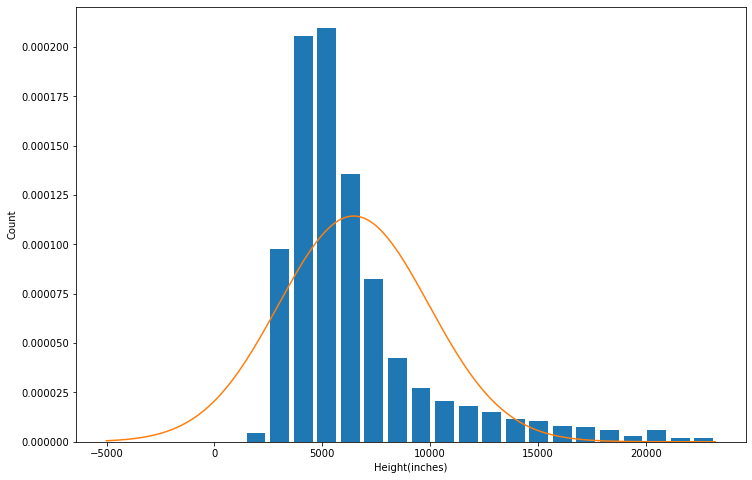

In [24]:
plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8, density=True )
plt.xlabel('Height(inches)')
plt.ylabel('Count')

rng = np.arange(-5000, df3.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng, df3.price_per_sqft.mean(), df3.price_per_sqft.std()))

In [31]:
# Now remove outlier using zscore. zcore of 4 as your thresold
df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()
df2.sample(10)

<ipython-input-31-364a93ddacf4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
10223,Hebbal Kempapura,5 Bedroom,2800.0,5.0,220.00,5,7857,0.288177
302,AECS Layout,2 BHK,1100.0,2.0,45.00,2,4090,-0.621502
2782,Hebbal,2 BHK,1420.0,2.0,123.00,2,8661,0.482332
7375,Channasandra,4 Bedroom,1800.0,4.0,300.00,4,16666,2.415430
11932,Sarjapur Road,2 BHK,1273.0,2.0,60.00,2,4713,-0.471056
10494,Banashankari,2 BHK,1450.0,2.0,50.75,2,3500,-0.763979
3001,other,2 Bedroom,792.0,2.0,70.00,2,8838,0.525075
12394,Hosa Road,3 BHK,1893.0,3.0,130.00,3,6867,0.049105
7282,other,6 BHK,900.0,5.0,100.00,6,11111,1.073973
9605,other,3 BHK,1455.0,2.0,45.00,3,3092,-0.862506


In [32]:
outliers_z = df2[(df2.zscore < -4) | (df2.zscore>4)]
outliers_z.shape

(125, 8)

In [34]:
outliers_z.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
12948,other,10 Bedroom,7150.0,13.0,3600.0,10,50349,10.549415
4119,other,4 Bedroom,7000.0,5.0,2050.0,4,29285,5.462746
4400,other,8 Bedroom,750.0,8.0,200.0,8,26666,4.830294
9099,Whitefield,3 BHK,1496.0,2.0,718.0,3,47994,9.980715
9907,other,8 Bedroom,600.0,4.0,175.0,8,29166,5.434010


In [35]:
df4 = df2[(df2.zscore>-4)|(df2.zscore>4)]
df4.shape

(13172, 8)

In [37]:
df2.shape[0]-df4.shape[0]

0